# Trade network analysis
**Brian Dew (brianwdew@gmail.com)**

`07_individual_product.ipynb`

This notebook summarizes results for an individual product and year. 

METODO:

1. Annotate

#### Import packages

In [8]:
# uses panadas, networkx, powerlaw, and os packages
import pandas as pd
import networkx as nx
import powerlaw
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

os.chdir('C:/Working/trade_network/data/')        # Change to working directory

#### Build network and fit to distributions

The work of deg_dist is repeated here for the product code identified in `prod` 

In [9]:
pl_ = {}
prod = 270900
df = pd.read_csv('clean/baci07_2011_clean.csv', index_col='hs6').sort_index()
G = nx.from_pandas_dataframe(df.loc[prod], 'i', 'j', 'v', nx.DiGraph())  #build network
deg = G.out_degree(weight='v').values()         # calc weighted outdeg for each country
fit = powerlaw.Fit(deg)         # est. distrib. and save alpha value

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


#### Print the estimated values

Print estimated alpha value, std dev, and estimated minimum value/cutoff for the distribution

In [10]:
print 'Alpha: ', fit.power_law.alpha
print 'Sigma: ', fit.power_law.sigma
print 'X-Min: ', fit.power_law.xmin

Alpha:  2.78473704121
Sigma:  0.515209205587
X-Min:  49158802.7


#### Compare fit

Compare the how well the data fit a power law compared to exponential distribution.

In [11]:
fit.distribution_compare('power_law', 'exponential')

(2.5595129658444655, 0.13733454955901553)

#### Plot fit

How well do the data (solid line) fit the distribution (dashed line)?

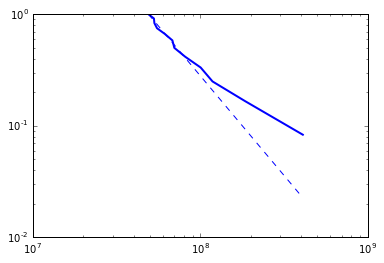

In [12]:
fig2 = fit.plot_ccdf(color='b', linewidth=2)
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=fig2)